# Computer Hardware ML Models

This notebook contains the implementation of the following ML models on the Computer Hardware dataset:

- Linear Regression
- Decision Trees
- ANN
- Support Vector Machines


## Setting up

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr

In [2]:
# import sklearn
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold

## Import Computer Hardware Dataset

In [3]:
column_headings = [
    'vendor name',
    'Model Name',
    'ERP: estimated relative performance from the original article (integer)',
    'MYCT(Machine Cycle time in nanoseconds)',
    'MMIN(minimum main memory in kilobytes (integer)',
    'MMAX(maximum main memory in kilobytes (integer)',
    'CACH: cache memory in kilobytes (integer)',
    'CHMIN: minimum channels in units (integer)',
    'CHMAX: maximum channels in units (integer)',
    'PRP: published relative performance (integer)'
]

In [4]:
all_df=pd.read_csv('machine.csv', names=column_headings, index_col=False)
all_df.head()

,vendor name,Model Name,ERP: estimated relative performance from the original article (integer),MYCT(Machine Cycle time in nanoseconds),MMIN(minimum main memory in kilobytes (integer),MMAX(maximum main memory in kilobytes (integer),CACH: cache memory in kilobytes (integer),CHMIN: minimum channels in units (integer),CHMAX: maximum channels in units (integer),PRP: published relative performance (integer)
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


## Linear Regression

In [5]:
# drop categorical columns
all_df.drop('vendor name',axis=1,inplace=True)
all_df.drop('Model Name',axis=1,inplace=True)
all_df.drop('ERP: estimated relative performance from the original article (integer)',axis=1,inplace=True)
all_df.head()

,MYCT(Machine Cycle time in nanoseconds),MMIN(minimum main memory in kilobytes (integer),MMAX(maximum main memory in kilobytes (integer),CACH: cache memory in kilobytes (integer),CHMIN: minimum channels in units (integer),CHMAX: maximum channels in units (integer),PRP: published relative performance (integer)
0,256,6000,256,16,128,198,199
1,8000,32000,32,8,32,269,253
2,8000,32000,32,8,32,220,253
3,8000,32000,32,8,32,172,253
4,8000,16000,32,8,16,132,132


In [6]:
# checking data types of columns
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   MYCT(Machine Cycle time in nanoseconds)          209 non-null    int64
 1   MMIN(minimum main memory in kilobytes (integer)  209 non-null    int64
 2   MMAX(maximum main memory in kilobytes (integer)  209 non-null    int64
 3   CACH: cache memory in kilobytes (integer)        209 non-null    int64
 4   CHMIN: minimum channels in units (integer)       209 non-null    int64
 5   CHMAX: maximum channels in units (integer)       209 non-null    int64
 6   PRP: published relative performance (integer)    209 non-null    int64
dtypes: int64(7)
memory usage: 11.6 KB


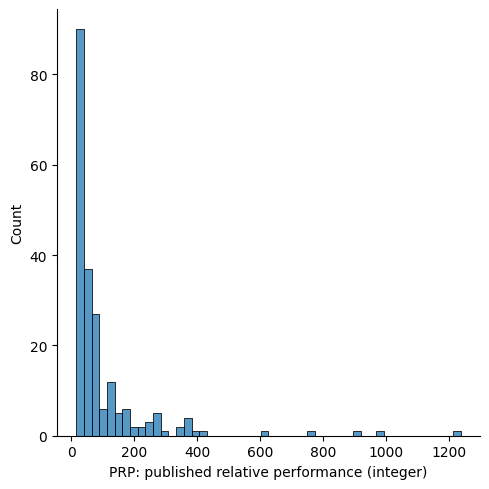

In [7]:
# display the overall variation of the data
# as seen here, many of the rows are closer to 0 vs the higher values. This could cause the linear regression to skew the best fit line.
sns.displot(all_df['PRP: published relative performance (integer)'])

<Axes: title={'center': 'Computer hardware Feature Correlation'}>

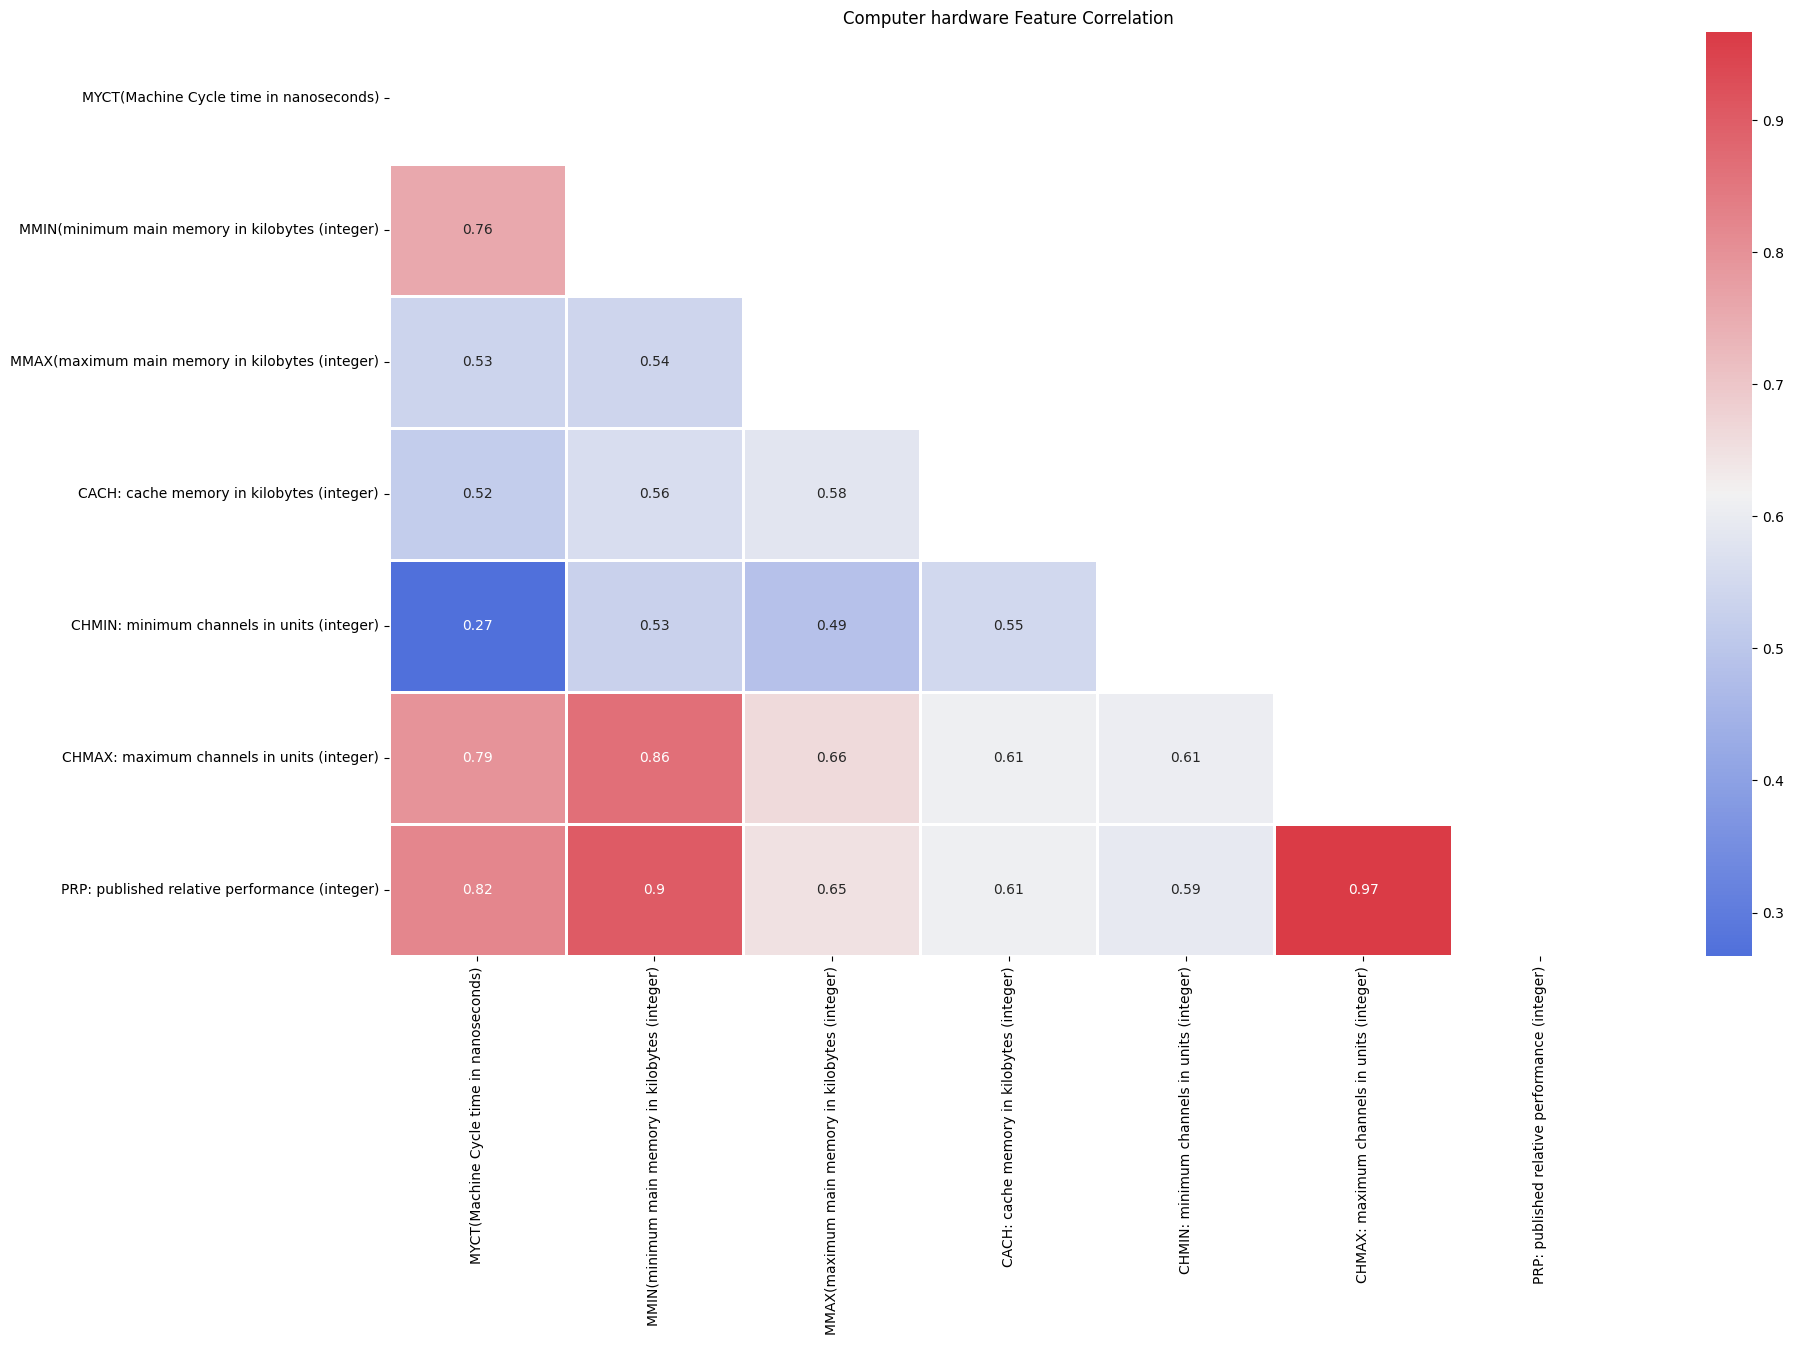

In [8]:
# let's identify correlations between features and target

corrMatt = all_df.corr()
mask= np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)]=True

fig,ax=plt.subplots(figsize=(20,12))
plt.title('Computer hardware Feature Correlation')

cmap=sns.diverging_palette(260,10,as_cmap=True)

sns.heatmap(corrMatt, square=False,cmap=cmap,mask=mask,
            ax=ax,annot=True,fmt='.2g',linewidths=1)

# MMAX and MMIN have a strong positive correlation with PRP published relative performance 
# Cache , CHMIN and CHMAX are moderately positive correlated with PRP

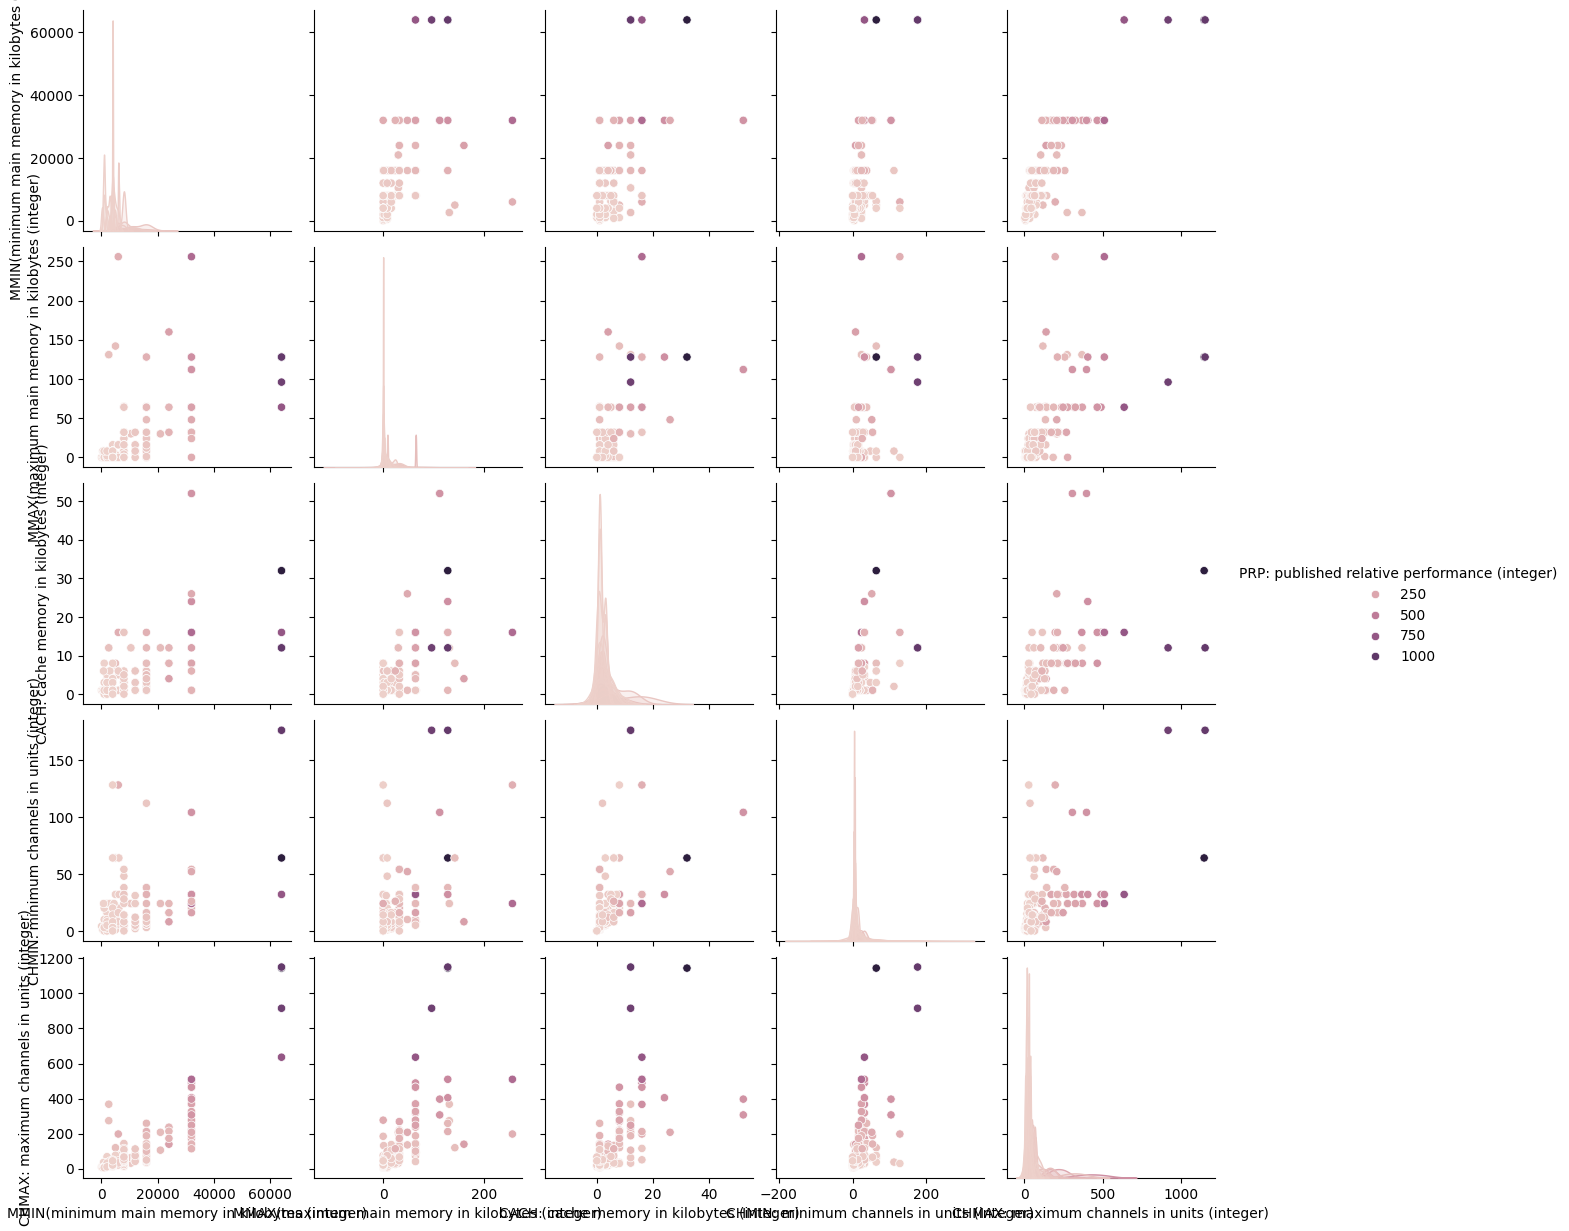

In [9]:
# we can visualize paired relationships between PRP and other columns

sns.pairplot(all_df[list(all_df.columns[1:6])+['PRP: published relative performance (integer)']],hue="PRP: published relative performance (integer)")

In [10]:
# define features and target variable
X=all_df[['MYCT(Machine Cycle time in nanoseconds)',
       'MMIN(minimum main memory in kilobytes (integer)',
       'MMAX(maximum main memory in kilobytes (integer)',
       'CACH: cache memory in kilobytes (integer)',
       'CHMIN: minimum channels in units (integer)',
       'CHMAX: maximum channels in units (integer)']]
y=all_df['PRP: published relative performance (integer)']

In [11]:
# split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
# initialize LR and train
l_r=LinearRegression()
l_r.fit(X_train,y_train)

LinearRegression()

In [13]:
# gather the intercept, which is where the value starts when all values are 0. Baseline.
intercept = l_r.intercept_
intercept

-18.37497335535788

In [14]:
# gather the slope, which shows how the PRP changes for a one-unit change in the dependant variables, e.g. MYCT
slope = l_r.coef_[0] # this is the slope for MYCT specifically
print(slope)

0.003040036601234238


In [15]:
# this is the list of all the slopes for the different features
l_r.coef_

array([ 0.00304004,  0.00378284,  0.29302616, -0.33379967,  0.1667067 ,
        0.50364859])

In [16]:
# a table to represent these slopes better
cdf = pd.DataFrame(l_r.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
MYCT(Machine Cycle time in nanoseconds),0.003040
MMIN(minimum main memory in kilobytes (integer),0.003783
MMAX(maximum main memory in kilobytes (integer),0.293026
CACH: cache memory in kilobytes (integer),-0.333800
CHMIN: minimum channels in units (integer),0.166707
CHMAX: maximum channels in units (integer),0.503649


In [17]:
# predict values from x_test
predictions = l_r.predict(X_test)
predictions

array([ 1.71900024e+02,  1.52389135e+01,  1.08755389e+01,  7.62350919e+02,
        2.10574117e+01,  3.11269921e+02,  5.48268094e+01, -7.50321199e+00,
        9.34677018e+02,  2.27570143e+02,  8.86648573e+01,  1.29827070e+02,
        4.58238519e+01,  4.29750679e+01,  6.53341038e+01,  1.54378107e+01,
        5.91046389e+01,  8.84216100e+00,  1.35587770e+02,  1.21082957e+02,
        5.82926205e+01,  6.49661075e+01,  1.28967371e+02,  1.00338218e+01,
       -7.49588505e+00,  4.49888055e+01,  2.68373857e+01,  1.64338184e+01,
        3.86262281e+00,  5.78708312e+01,  2.69316479e+02,  2.34634577e+01,
        3.38976192e+01,  3.72949000e+00, -5.83258043e-01,  3.53879264e+01,
        5.65655490e+01,  4.02926970e+02,  8.46769317e+01,  9.02489530e+00,
        2.96174984e+02,  4.21718100e+01])

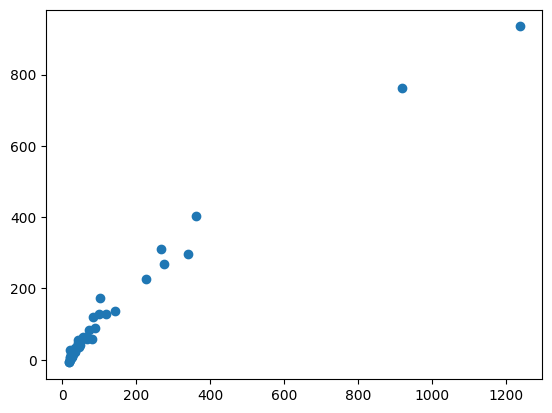

In [18]:
# plot the scatter of predictions against y_test
plt.scatter(y_test, predictions)

In [19]:
# we generate a sequence of values for the x line, to draw the best fit for the regression. We are using 100 samples
x_line = np.linspace(min(X['MYCT(Machine Cycle time in nanoseconds)']), max(X['MYCT(Machine Cycle time in nanoseconds)']), 100)
x_line

array([   64.        ,   386.58585859,   709.17171717,  1031.75757576,
        1354.34343434,  1676.92929293,  1999.51515152,  2322.1010101 ,
        2644.68686869,  2967.27272727,  3289.85858586,  3612.44444444,
        3935.03030303,  4257.61616162,  4580.2020202 ,  4902.78787879,
        5225.37373737,  5547.95959596,  5870.54545455,  6193.13131313,
        6515.71717172,  6838.3030303 ,  7160.88888889,  7483.47474747,
        7806.06060606,  8128.64646465,  8451.23232323,  8773.81818182,
        9096.4040404 ,  9418.98989899,  9741.57575758, 10064.16161616,
       10386.74747475, 10709.33333333, 11031.91919192, 11354.50505051,
       11677.09090909, 11999.67676768, 12322.26262626, 12644.84848485,
       12967.43434343, 13290.02020202, 13612.60606061, 13935.19191919,
       14257.77777778, 14580.36363636, 14902.94949495, 15225.53535354,
       15548.12121212, 15870.70707071, 16193.29292929, 16515.87878788,
       16838.46464646, 17161.05050505, 17483.63636364, 17806.22222222,
      

In [20]:
# calculate the y line from multiplying the slope by the x line + intercept. y = ax + b
y_line = slope * x_line + intercept

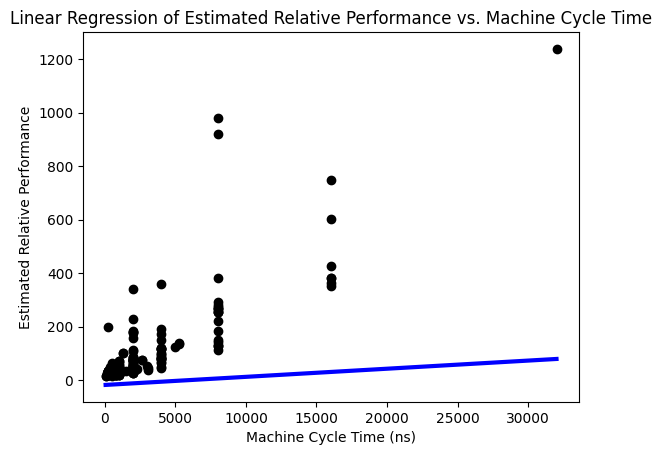

In [21]:
# plot the scatter plot for the linear regression with MYCT against PRP
plt.scatter(X['MYCT(Machine Cycle time in nanoseconds)'], y, color="black")
plt.plot(x_line, y_line, color="blue", linewidth=3)

plt.title("Linear Regression of Estimated Relative Performance vs. Machine Cycle Time")
plt.xlabel("Machine Cycle Time (ns)")
plt.ylabel("Estimated Relative Performance")

plt.show()

# the line seems to be quite far from the actual values, which suggests that outliers may be affecting the regression

### K-Fold

In [22]:
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

model = LinearRegression()
validation_scores = []

for train_indices, val_indices in kf.split(X):
    model.fit(X.loc[train_indices], y[train_indices])
    val_score = model.score(X.loc[val_indices], y[val_indices])

    validation_scores.append(val_score)

mean_score = np.mean(validation_scores)
# print avg validation score
mean_score

0.9352728844168597

In [23]:
# print all validation scores
validation_scores

[0.940230083318219,
 0.9322440134366847,
 0.9205870035428906,
 0.9388478295304314,
 0.9444554922560728]

## Importing dataset from ucirepo

In [24]:
# remaining models are done with the ucirepo of the computer hardware dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
computer_hardware = fetch_ucirepo(id=29) 
  
# data (as pandas dataframes) 
X = computer_hardware.data.features 
y = computer_hardware.data.targets 

In [25]:
X

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [26]:
y=abs(X['PRP']-X['ERP'])

In [27]:
y

0       1
1      16
2      33
3      81
4       0
       ..
204     5
205     4
206    11
207    20
208    20
Length: 209, dtype: int64

In [28]:
X=X.drop(columns=['VendorName','ModelName','PRP'])

In [29]:
X

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
0,125,256,6000,256,16,128,199
1,29,8000,32000,32,8,32,253
2,29,8000,32000,32,8,32,253
3,29,8000,32000,32,8,32,253
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,37
205,98,1000,8000,32,2,8,50
206,125,2000,8000,0,2,14,41
207,480,512,8000,32,0,0,47


In [30]:
# encode data into labels
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
X_encoded = X[X.columns].apply(labelEncoder.fit_transform)
print(X_encoded)

     MYCT  MMIN  MMAX  CACH  CHMIN  CHMAX  ERP
0      31     4    12    21     10     29   82
1       4    22    21    11      8     21   85
2       4    22    21    11      8     21   85
3       4    22    21    11      8     21   85
4       4    22    18    11      8     14   69
..    ...   ...   ...   ...    ...    ...  ...
204    30    11    15     0      1      8   21
205    23    11    15    11      2      8   33
206    31    14    15     0      2     12   25
207    52     8    15    11      0      0   31
208    52    11     9     0      0      0    9

[209 rows x 7 columns]


In [31]:
# scale data to make it easier to be processed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X_encoded)

In [32]:
Xs

array([[ 0.20222051, -1.71660673, -0.26836607, ...,  1.88689495,
         2.35083077,  1.53176113],
       [-1.30921037,  1.59173062,  1.33926634, ...,  1.29073313,
         1.31373603,  1.63358622],
       [-1.30921037,  1.59173062,  1.33926634, ...,  1.29073313,
         1.31373603,  1.63358622],
       ...,
       [ 0.20222051,  0.12135847,  0.2675114 , ..., -0.49775233,
         0.14700446, -0.40291554],
       [ 1.37777785, -0.98142065,  0.2675114 , ..., -1.09391416,
        -1.40863764, -0.19926536],
       [ 1.37777785, -0.43003109, -0.80424354, ..., -1.09391416,
        -1.40863764, -0.94598268]])

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_final = pca.fit_transform(Xs)

## Decision Trees

In [34]:
# test size of 20%
x_train, x_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=1)

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Create a decision tree regressor
tree_rg = DecisionTreeRegressor(random_state=42)
tree_rg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
tree_predictions = tree_rg.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, tree_predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 774.100529100529


### K-fold

In [38]:
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

model = DecisionTreeRegressor()
mse_scores = []

for train_indices, val_indices in kf.split(X):
    model.fit(X.loc[train_indices], y[train_indices])
    
    val_pred = model.predict(X.loc[val_indices])
    val_mse = mean_squared_error(y[val_indices], val_pred)

    mse_scores.append(val_mse)

mean_mse = np.mean(mse_scores)
mean_mse

1272.7031746031746

In [39]:
validation_scores

[0.940230083318219,
 0.9322440134366847,
 0.9205870035428906,
 0.9388478295304314,
 0.9444554922560728]

## Neural network

In [40]:
# scale the train and test data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
from sklearn.neural_network import MLPRegressor
mlp_rg = MLPRegressor(random_state=42, max_iter=20000)

mlp_rg.fit(x_train_scaled, y_train)

MLPRegressor(max_iter=20000, random_state=42)

In [43]:
predictions = mlp_rg.predict(x_test)

In [44]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7552.948412353183


### K-fold

In [45]:
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

model = MLPRegressor(random_state=42, max_iter=20000)
scores = []

for train_indices, val_indices in kf.split(X):
    model.fit(X.loc[train_indices], y[train_indices])

    # Evaluate the model on the validation set
    val_pred = model.predict(X.loc[val_indices])
    val_mse = mean_squared_error(y[val_indices], val_pred)

    # Append the validation MSE to the list
    scores.append(val_mse)

mean_mse = np.mean(scores)
mean_mse

438383.5292887663

In [46]:
scores

[579913.3867943741,
 453138.5683082322,
 237551.10958453445,
 512571.13371298887,
 408743.448043702]

## SVM

In [47]:
from sklearn.svm import SVR

In [48]:
model = SVR(C=1.0,kernel='poly',degree=3,gamma='auto')
model.fit(x_train_scaled,y_train)

SVR(gamma='auto', kernel='poly')

In [49]:
predictions=model.predict(x_test_scaled)

In [50]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['poly']} 

In [51]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.568 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.295 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.171 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.133 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.406 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.1, kernel=poly;, score=-0.118 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.1, kernel=poly;, score=-0.208 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.1, kernel=poly;, score=-0.001 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.1, kernel=poly;, score=-0.275 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.1, kernel=poly;, score=-0.125 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.128 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.01, kernel=poly;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly']},
             verbose=3)

In [52]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [53]:
grid.best_estimator_

SVR(C=0.1, gamma=1, kernel='poly')

In [54]:
grid_predictions = grid.predict(x_test_scaled)

In [55]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid_predictions)

In [56]:
mae

18.361488588535344

In [57]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid_predictions)

In [58]:
mse

753.2313561129189

In [59]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, grid_predictions)
r2

0.635321546030341

### K-fold

In [60]:
kf = KFold(n_splits=5, shuffle=True)
model = SVR()
scores = []

for train_indices, val_indices in kf.split(X):
    model.fit(X.loc[train_indices], y[train_indices])

    val_pred = model.predict(X.loc[val_indices])
    val_mse = mean_squared_error(y[val_indices], val_pred)

    scores.append(val_mse)

mean_mse = np.mean(scores)
mean_mse

1098.0438930767668

In [61]:
scores

[725.6835013877602,
 426.42853345775177,
 1077.20608037109,
 468.2422298148786,
 2792.6591203523535]